In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def wyjscieZkostki(d = 1, dt = 10**(-3)):
    data = np.zeros(d)
    t = 0
    
    while (abs(data) <= 1).all():
        data += np.sqrt(dt)*np.random.randn(d)
        t += dt        
    return t

In [12]:
def sredniCzasWyjsciaZkostki():
    MCS = 10**3
    srednie = []
    zakres = range(1,10)

    for d in zakres:
        data = [wyjscieZkostki(3, 10**(-3)) for _ in range(MCS)]
        srednie.append(np.mean(data))

    plt.scatter(zakres, srednie)
    plt.xlabel('d')
    plt.ylabel('Sredni czas wyjscia')
    plt.show()

In [23]:
def rozkladyCzasowWyjsciaZkostek():
    plt.figure(figsize = (14,4))
    MCS = 10**3

    for d in range(1,4):
        data = [wyjscieZkostki(3, 10**(-3)) for _ in range(MCS)]
        plt.subplot(1,3,d)
        plt.title('Czas wyjscia z kostki {}-wymiarowej'.format(d))
        plt.hist(data, bins = 20)

    plt.tight_layout()
    plt.show()

In [40]:
def podpunktB(dt, T):
    data = np.zeros(2)
    t = 0

    wyszedlPoza5 = False
    wrocilDo0 = False

    while t <= T:
        data += np.sqrt(dt)*np.random.randn(2)
        if not wyszedlPoza5:
            if np.sqrt(np.sum(data**2)) >= 5:
                wyszedlPoza5 = True
        else:
            if np.sqrt(np.sum(data**2)) <= 0.01:
                return True
        t += dt
    return False

In [37]:
def symulacjaPodpunktuB(dt, T, MCS):
    return np.mean([podpunktB(dt, T) for _ in range(MCS)])

In [43]:
def analizaPodpunktuB(dt, T, MCS):
    toReturn = []
    for t in T:
        temp = symulacjaPodpunktuB(dt,t,MCS)
        print('Dla T = {} prawdopodobieństwo wynosi '.format(t), temp)
        toReturn.append(temp)
    
    plt.scatter(T,toReturn)
    plt.show()

In [7]:
def podpunktC(dt, T):
    data = np.zeros(2)
    t = 0
    
    while t <= T:
        data += np.sqrt(dt)*np.random.randn(2)
        if np.sum((data - 5)**2) <= 1:
            return 1
        t += dt
    return 0

In [5]:
def symulacjaPodpunktuC(dt, T, MCS):
    with open('PodpunktC.txt', 'a') as f:
        counter = 0
        for _ in range(MCS):
            score = podpunktC(dt,T)
            f.write(str(score) + '\n')
            counter += score
    print('Prawdopodobieństwo wynosi: ', counter/MCS)
    return counter/MCS

In [12]:
def podpunktD(dt, T):
    data = np.zeros(2)
    t = 0
    kulaNr3 = np.array([-1,3])

    trafilW2 = False

    while t <= T:
        data += np.sqrt(dt)*np.random.randn(2)
        if not trafilW2:
            if np.sum((data - 2)**2) <= 1:
                trafilW2 = True
                #print('Wszedl w kule o srodku (2,2).')
        elif np.sum((data - 3)**2) <= 0.5:
            #print('Wszedl w kule o srodku (3,3).')
            return 0
        elif trafilW2 and np.sum((data - kulaNr3)**2) <= 1.6:
            #print('Wszedl w kule o srodku (-1,3).')
            return 1    
        t += dt
    return 0

In [13]:
def symulacjaPodpunktuD(dt, T, MCS):
    with open('PodpunktD.txt', 'a') as f:
        counter = 0
        for _ in range(MCS):
            score = podpunktD(dt,T)
            f.write(str(score) + '\n')
            counter += score
    print('Prawdopodobieństwo wynosi: ', counter/MCS)
    return counter/MCS

# Teoria

To do:
- momenty stopu (momenty Markowa)
- trafienie procesu stochastycznego w zbiór
- procesy tranzytywne
- zbiory polarne

# Podpunkt A

W tym podpunkcie będziemy chcieli oszacować średni czas wyjścia d-wymiarowego ruchu Browna z kostki d-wymiarowej oraz zbadać rozkład tych czasów dla 1,2,3 wymiaru.

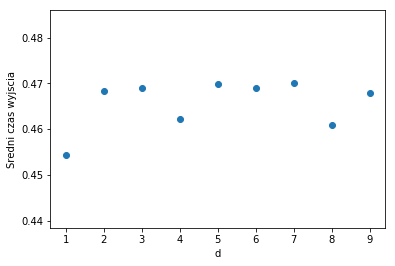

In [14]:
sredniCzasWyjsciaZkostki()

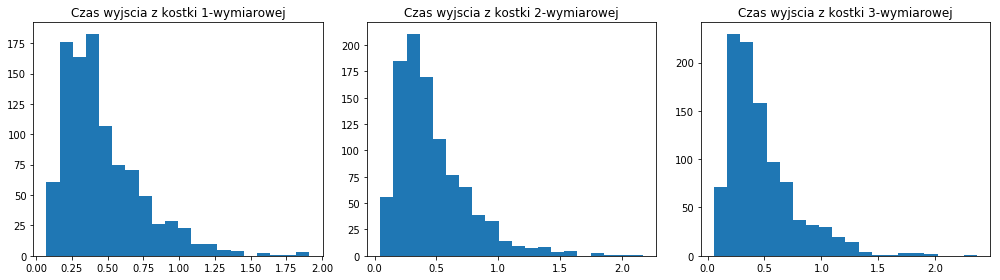

In [24]:
rozkladyCzasowWyjsciaZkostek()

Zbadać te rozkłady, tzn. wyznaczyć dystrybuanty, narysować boxploty, spróbować dopasować do jakiegoś rozkładu (wykładniczy).

# Podpunkt B

In [44]:
dt = 10**(-3)
T = [10, 20, 30]
MCS = 100

analizaPodpunktuB(dt, T, MCS)

Dla T = 10 prawdopodobieństwo wynosi  0.0
Dla T = 20 prawdopodobieństwo wynosi  0.0
Dla T = 30 prawdopodobieństwo wynosi  0.0


# Podpunkt C

In [8]:
dt = 10**(-4)
T = 100000
MCS = 10000
symulacjaPodpunktuC(dt, T, MCS)

Prawdopodobieństwo wynosi:  0.02


0.02

# Podpunkt D

In [14]:
dt = 10**(-4)
T = 100000
MCS = 10000
symulacjaPodpunktuD(dt, T, MCS)

Prawdopodobieństwo wynosi:  0.08


0.08